<a href="https://colab.research.google.com/github/iamatul1214/Tensorflow_Certification_Preparation/blob/main/02_Neural_Network_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## We have 3 types of classifications
* Binary classification
* Multiple classification
* Multilabel classification

### creating data

In [ ]:
## Making 1000 examples
from sklearn.datasets import make_circles

n_samples = 1000

## create circles
X,y = make_circles(n_samples, noise=0.03,random_state = 42)

In [ ]:
X

array([[ 0.75424625,  0.23148074],
       [-0.75615888,  0.15325888],
       [-0.81539193,  0.17328203],
       ...,
       [-0.13690036, -0.81001183],
       [ 0.67036156, -0.76750154],
       [ 0.28105665,  0.96382443]])

In [ ]:
y[:10]

array([1, 1, 1, 1, 0, 1, 1, 1, 1, 0])

### Our data is little hard to understand right now so let's visualize

In [ ]:
import pandas as pd
circles = pd.DataFrame({"x0":X[:,0], "x1":X[:,1], "label":y})
circles

,x0,x1,label
0,0.754246,0.231481,1
1,-0.756159,0.153259,1
2,-0.815392,0.173282,1
3,-0.393731,0.692883,1
4,0.442208,-0.896723,0
...,...,...,...
995,0.244054,0.944125,0
996,-0.978655,-0.272373,0
997,-0.136900,-0.810012,1
998,0.670362,-0.767502,0


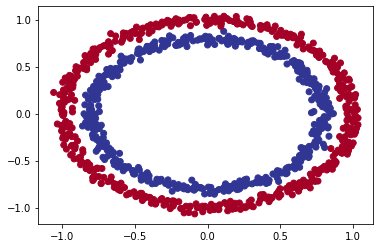

In [ ]:
## visualizing with plots

import matplotlib.pyplot as plt
plt.scatter(X[:,0],X[:,1], c=y ,cmap = plt.cm.RdYlBu);

### Let's create a simple model for our classification problem

In [ ]:
## import tensorflow
import tensorflow as tf
tf.__version__

'2.8.2'

## Model 1

In [ ]:
tf.random.set_seed(42)

## creating model
model_1 = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

## compiling the model
model_1.compile(loss = tf.keras.losses.BinaryCrossentropy(),
                optimizer = tf.keras.optimizers.SGD(),
                metrics = ['accuracy'])

## fitting the model

model_1.fit(X,y, epochs = 10)

Epoch 1/10
32/32 [==============================] - 1s 2ms/step - loss: 2.8544 - accuracy: 0.4600
Epoch 2/10
32/32 [==============================] - 0s 2ms/step - loss: 0.7131 - accuracy: 0.5430
Epoch 3/10
32/32 [==============================] - 0s 2ms/step - loss: 0.6973 - accuracy: 0.5090
Epoch 4/10
32/32 [==============================] - 0s 2ms/step - loss: 0.6950 - accuracy: 0.5010
Epoch 5/10
32/32 [==============================] - 0s 2ms/step - loss: 0.6942 - accuracy: 0.4830
Epoch 6/10
32/32 [==============================] - 0s 2ms/step - loss: 0.6938 - accuracy: 0.4990
Epoch 7/10
32/32 [==============================] - 0s 2ms/step - loss: 0.6943 - accuracy: 0.4880
Epoch 8/10
32/32 [==============================] - 0s 2ms/step - loss: 0.6941 - accuracy: 0.4950
Epoch 9/10
32/32 [==============================] - 0s 2ms/step - loss: 0.6940 - accuracy: 0.4840
Epoch 10/10
32/32 [==============================] - 0s 2ms/step - loss: 0.6938 - accuracy: 0.4820


In [ ]:
## Let's try to increase the epochs
model_1.fit(X,y ,epochs=200, verbose=0)
model_1.evaluate(X,y)

32/32 [==============================] - 0s 1ms/step - loss: 0.6935 - accuracy: 0.5000


[0.6934831142425537, 0.5]

### Model 2

In [ ]:
tf.random.set_seed(42)

## model creation
model_2 = tf.keras.Sequential([
    tf.keras.layers.Dense(2),
    tf.keras.layers.Dense(1)
])

## compiling
model_2.compile(loss = tf.keras.losses.BinaryCrossentropy(),
                optimizer = tf.keras.optimizers.SGD(),
                metrics = ['accuracy'])

## fitting
model_2.fit(X,y,epochs = 100)

Epoch 1/100
32/32 [==============================] - 1s 2ms/step - loss: 0.9063 - accuracy: 0.4880
Epoch 2/100
32/32 [==============================] - 0s 2ms/step - loss: 0.7292 - accuracy: 0.4900
Epoch 3/100
32/32 [==============================] - 0s 2ms/step - loss: 0.7180 - accuracy: 0.4950
Epoch 4/100
32/32 [==============================] - 0s 2ms/step - loss: 0.7106 - accuracy: 0.4970
Epoch 5/100
32/32 [==============================] - 0s 1ms/step - loss: 0.7060 - accuracy: 0.4930
Epoch 6/100
32/32 [==============================] - 0s 2ms/step - loss: 0.7029 - accuracy: 0.4940
Epoch 7/100
32/32 [==============================] - 0s 2ms/step - loss: 0.7020 - accuracy: 0.5030
Epoch 8/100
32/32 [==============================] - 0s 3ms/step - loss: 0.7002 - accuracy: 0.4930
Epoch 9/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6990 - accuracy: 0.4950
Epoch 10/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6979 - accuracy: 0.4890
Epoch 11/

In [ ]:
model_2.evaluate(X,y)

32/32 [==============================] - 0s 1ms/step - loss: 0.6933 - accuracy: 0.4190


[0.6933411955833435, 0.4189999997615814]

### As we observed our accuracy hasn't improved at all, now we will try to create model in another format to see if it can help us.

## Model 3

In [ ]:
tf.random.set_seed(42)

## model creation
model_3 = tf.keras.Sequential([
    tf.keras.layers.Dense(2),
    tf.keras.layers.Dense(10, activation='relu'),
    tf.keras.layers.Dense(5, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

## compiling
model_3.compile(loss = tf.keras.losses.BinaryCrossentropy(),
                optimizer = tf.keras.optimizers.SGD(),
                metrics = ['accuracy'])

## fitting
model_3.fit(X,y, epochs = 100)

Epoch 1/100
32/32 [==============================] - 1s 2ms/step - loss: 0.6949 - accuracy: 0.4970
Epoch 2/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6948 - accuracy: 0.4960
Epoch 3/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6947 - accuracy: 0.4950
Epoch 4/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6946 - accuracy: 0.4980
Epoch 5/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6945 - accuracy: 0.4810
Epoch 6/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6945 - accuracy: 0.4900
Epoch 7/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6944 - accuracy: 0.4840
Epoch 8/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6944 - accuracy: 0.4810
Epoch 9/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6943 - accuracy: 0.4760
Epoch 10/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6942 - accuracy: 0.4900
Epoch 11/

### Model 4

In [ ]:
tf.random.set_seed(42)

## model creation
model_4 = tf.keras.Sequential([
    tf.keras.layers.Dense(2),
    tf.keras.layers.Dense(10, activation='relu'),
    tf.keras.layers.Dense(5, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

## compiling
model_4.compile(loss = tf.keras.losses.BinaryCrossentropy(),
                optimizer = tf.keras.optimizers.Adam(),
                metrics = ['accuracy'])

## fitting
history = model_4.fit(X,y, epochs = 100)

Epoch 1/100
32/32 [==============================] - 1s 2ms/step - loss: 0.6945 - accuracy: 0.4960
Epoch 2/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6936 - accuracy: 0.5030
Epoch 3/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6928 - accuracy: 0.4840
Epoch 4/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6922 - accuracy: 0.4920
Epoch 5/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6917 - accuracy: 0.4990
Epoch 6/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6912 - accuracy: 0.5000
Epoch 7/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6904 - accuracy: 0.5240
Epoch 8/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6898 - accuracy: 0.5130
Epoch 9/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6889 - accuracy: 0.5170
Epoch 10/100
32/32 [==============================] - 0s 3ms/step - loss: 0.6883 - accuracy: 0.5200
Epoch 11/

In [ ]:
model_3.predict(X)

array([[0.49224496],
       [0.500575  ],
       [0.4994931 ],
       [0.49828207],
       [0.49012178],
       [0.49731138],
       [0.5027649 ],
       [0.49061623],
       [0.5069503 ],
       [0.49822176],
       [0.5095616 ],
       [0.510574  ],
       [0.500724  ],
       [0.48806655],
       [0.48903033],
       [0.49692628],
       [0.50479347],
       [0.49876413],
       [0.50315136],
       [0.5096258 ],
       [0.5018422 ],
       [0.49378797],
       [0.5004116 ],
       [0.49350667],
       [0.4943809 ],
       [0.49747354],
       [0.5053474 ],
       [0.48743266],
       [0.49536052],
       [0.48872322],
       [0.51042414],
       [0.49693298],
       [0.50337523],
       [0.484592  ],
       [0.50148165],
       [0.49293154],
       [0.49752393],
       [0.5113404 ],
       [0.4953518 ],
       [0.5017502 ],
       [0.5097852 ],
       [0.5071078 ],
       [0.50957793],
       [0.4865638 ],
       [0.5085134 ],
       [0.5052438 ],
       [0.49049038],
       [0.506

In [ ]:
model_4.predict(X)

array([[9.72065330e-01],
       [9.66239929e-01],
       [8.62747312e-01],
       [9.39571023e-01],
       [3.11920941e-02],
       [9.13465381e-01],
       [9.45614994e-01],
       [9.66452003e-01],
       [8.71854007e-01],
       [1.12820864e-02],
       [8.09763551e-01],
       [1.94974840e-02],
       [8.68484139e-01],
       [9.67295885e-01],
       [8.05553079e-01],
       [9.23677325e-01],
       [5.85785210e-02],
       [9.13223028e-01],
       [8.55380177e-01],
       [1.74482197e-01],
       [9.85619187e-01],
       [2.20806003e-02],
       [4.04076576e-02],
       [9.77168202e-01],
       [8.47433805e-02],
       [1.64736390e-01],
       [3.48224938e-02],
       [7.97575712e-01],
       [8.76131892e-01],
       [9.61483240e-01],
       [1.52003229e-01],
       [1.96228921e-02],
       [9.58087802e-01],
       [2.39834189e-03],
       [6.17998838e-03],
       [1.83573365e-02],
       [9.34751630e-01],
       [9.15518045e-01],
       [9.21657443e-01],
       [5.74185848e-02],


### To visualize our model predictions, let's create a function `plot_decision_boundary()`, this function will:
* Take a trained model, X,Y
* Create meshgrid of different X values
* Make predictions across meshgrids
* Plot the predictions as well as a line between zones (where each unique class falls) 

In [ ]:
import numpy as np

In [ ]:
import numpy as np

def plot_decision_boundary(model,X,y):
  """ 
  Plots a decision boundary created by a model predicting on X.
  """
  # Define the axis boundary of plot and create a meshgrid
  x_min, x_max = X[:,0].min() - 0.1, X[:,0].max() + 0.1
  y_min, y_max = X[:,1].min() - 0.1, X[:,1].max() + 0.1
  xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100),
                       np.linspace(y_min,y_max,100))
  
  ## create x values as we are going to make predictions on these
  x_in = np.c_[xx.ravel(), yy.ravel()]

  ## make predictions
  y_pred = model.predict(x_in)

  ## check for multiclass
  if len(y_pred[0]) > 1:
    print("doing multiclass classification")
    y_pred = np.argmax(y_pred, axis=1).reshape(xx.shape)

  else:
    print("doing binary classification")
    y_pred = np.round(y_pred).reshape(xx.shape)

  # plot the decision boundary
  plt.contourf(xx,yy,y_pred, cmap=plt.cm.RdYlBu, alpha=0.7)
  plt.scatter(X[:,0],X[:,1],c=y, s=40, cmap=plt.cm.RdYlBu)
  plt.xlim(xx.min(),xx.max())
  plt.ylim(yy.min(), yy.max())


doing binary classification


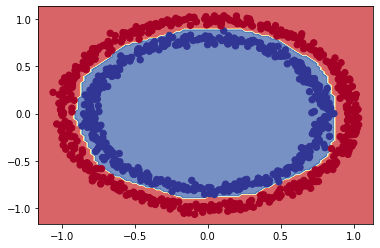

In [ ]:
plot_decision_boundary(model_4,X,y) 

## We observed that the boundary has been calculated perfectly and that's why we received the best accuracy

doing binary classification


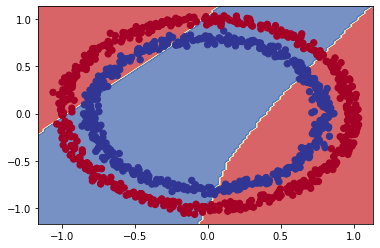

In [ ]:
## checking on model_3

plot_decision_boundary(model_3,X,y)

doing binary classification


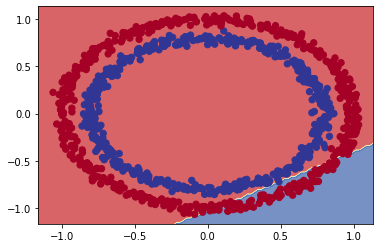

In [ ]:
plot_decision_boundary(model_2,X,y)

doing binary classification


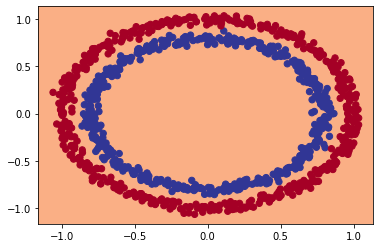

In [ ]:
plot_decision_boundary(model_1,X,y)

doing binary classification


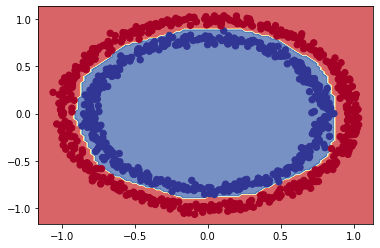

In [ ]:
plot_decision_boundary(model_4,X,y)

In [ ]:
  x_min, x_max = X[:,0].min() - 0.1, X[:,0].max() + 0.1
  y_min, y_max = X[:,1].min() - 0.1, X[:,1].max() + 0.1
  xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100),
                       np.linspace(y_min,y_max,100))

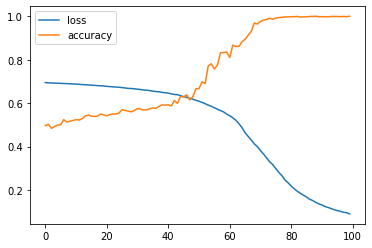

In [ ]:
import pandas as pd
pd.DataFrame(history.history).plot()


In [ ]:
history.history

{'loss': [0.6944710612297058,
  0.6935732364654541,
  0.6927604079246521,
  0.6922218799591064,
  0.6916939616203308,
  0.6912038922309875,
  0.6904160976409912,
  0.6898316144943237,
  0.6889241337776184,
  0.6882691979408264,
  0.6874390840530396,
  0.6865603923797607,
  0.6855806708335876,
  0.6846044659614563,
  0.6836192607879639,
  0.682595431804657,
  0.681826114654541,
  0.6806650161743164,
  0.6798739433288574,
  0.6786636114120483,
  0.6773961782455444,
  0.6762107610702515,
  0.6749440431594849,
  0.6741687059402466,
  0.672987699508667,
  0.671523928642273,
  0.6697941422462463,
  0.6676652431488037,
  0.6673234105110168,
  0.6657484173774719,
  0.6641712784767151,
  0.6627783179283142,
  0.6604337096214294,
  0.6597973108291626,
  0.6575716733932495,
  0.6552436947822571,
  0.6534525156021118,
  0.6521438956260681,
  0.6493985652923584,
  0.6479238867759705,
  0.6460734009742737,
  0.6425811648368835,
  0.6398378610610962,
  0.6389680504798889,
  0.6341378092765808,
  0.62

In [ ]:
X_train,y_train = X[:800],y[:800]
X_test,y_test = X[800:],y[800:]
X_test.shape,y_test.shape

((200, 2), (200,))

## Model 5: Just changing the learning rate taking lower value and expecting faster convergence

In [ ]:
tf.random.set_seed(42)

## model creation
model_5 = tf.keras.Sequential([
    # tf.keras.layers.Dense(2),
    tf.keras.layers.Dense(10, activation='relu'),
    tf.keras.layers.Dense(5, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

## compiling
model_5.compile(loss = tf.keras.losses.BinaryCrossentropy(),
                optimizer = tf.keras.optimizers.Adam(learning_rate=0.01),
                metrics = ['accuracy'])

## fitting
history = model_5.fit(X_train,y_train, epochs = 10)

Epoch 1/10
25/25 [==============================] - 1s 5ms/step - loss: 0.6846 - accuracy: 0.5913
Epoch 2/10
25/25 [==============================] - 0s 6ms/step - loss: 0.6694 - accuracy: 0.6313
Epoch 3/10
25/25 [==============================] - 0s 4ms/step - loss: 0.6405 - accuracy: 0.6263
Epoch 4/10
25/25 [==============================] - 0s 4ms/step - loss: 0.5844 - accuracy: 0.8500
Epoch 5/10
25/25 [==============================] - 0s 5ms/step - loss: 0.5161 - accuracy: 0.8838
Epoch 6/10
25/25 [==============================] - 0s 7ms/step - loss: 0.4193 - accuracy: 0.9538
Epoch 7/10
25/25 [==============================] - 0s 6ms/step - loss: 0.3344 - accuracy: 0.9675
Epoch 8/10
25/25 [==============================] - 0s 4ms/step - loss: 0.2531 - accuracy: 0.9812
Epoch 9/10
25/25 [==============================] - 0s 5ms/step - loss: 0.1902 - accuracy: 0.9925
Epoch 10/10
25/25 [==============================] - 0s 4ms/step - loss: 0.1361 - accuracy: 0.9962


In [ ]:
model_5.evaluate(X_test,y_test)

7/7 [==============================] - 0s 2ms/step - loss: 0.1126 - accuracy: 1.0000


[0.11261779069900513, 1.0]

doing binary classification
doing binary classification


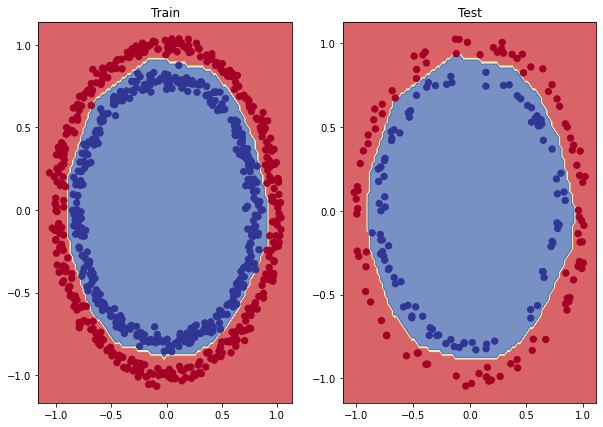

In [51]:
### PLotting the decision boundaries for training and test sets
plt.figure(figsize=(10,7))
plt.subplot(1,2,1)
plt.title("Train")
plot_decision_boundary(model_5,X_train,y_train)
plt.subplot(1,2,2)
plt.title("Test")
plot_decision_boundary(model_5,X_test,y_test)
plt.show()
